### Домашняя работа к уроку 1

#### 1. Попробуйте видоизменить параметры разобранной на уроке двухслойной нейронной сети таким образом, чтобы улучшить ее точность (число нейронов, число эпох , можно изменять число слоев).

Загружаем данные из методички

In [1]:
'''
Исходный код к уроку 1.
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = Y[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return (x)*(1 - (x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

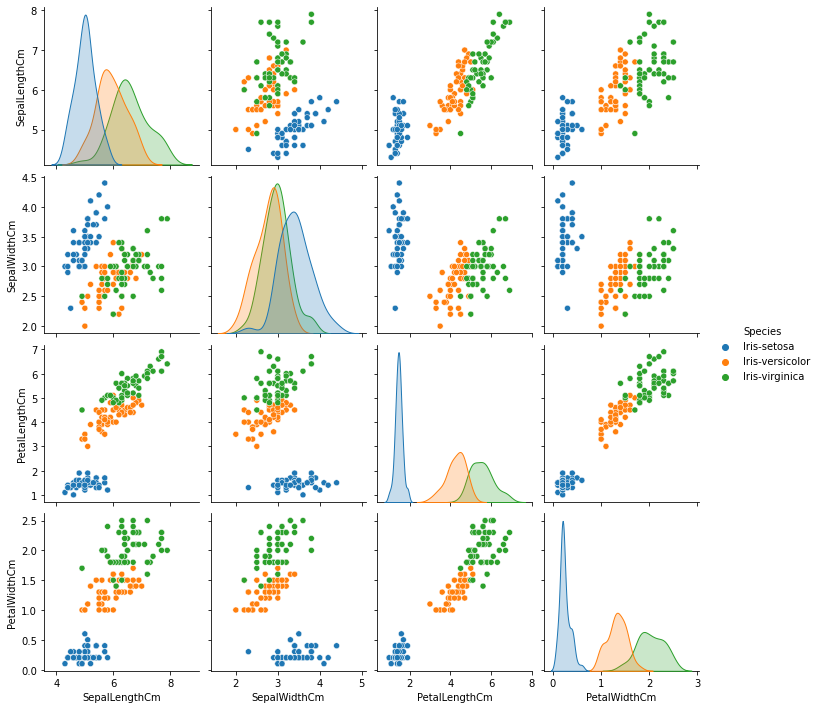

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("Iris.csv")
# print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
#x = normalize(x.as_matrix())
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
#y = y.as_matrix()
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

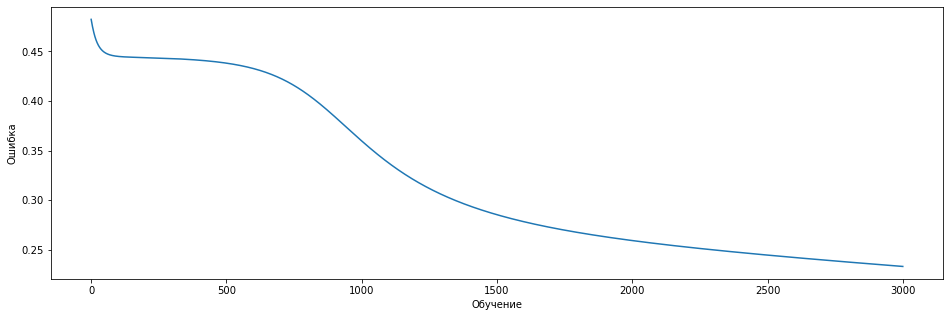

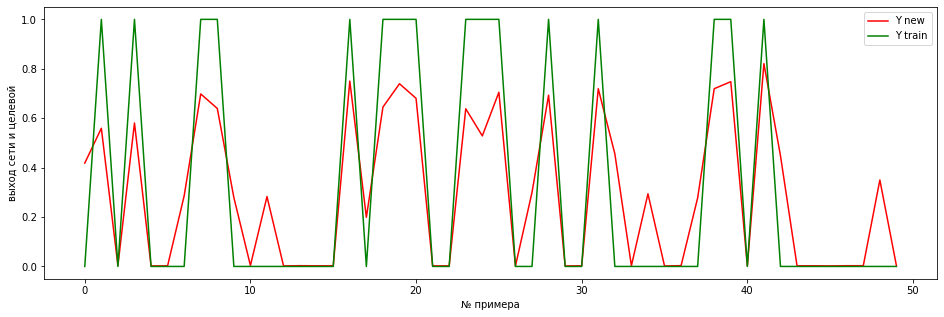

Аккуратность нейронной сети 76.69%


In [4]:
### Шаг 3. Обученние нейронной сети

# определим число нейронов скрытого слоя
neuron_numb = 5


# присваевание случайных весов



w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.005

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.figure(figsize = (16,5))
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 

N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2[:N,1], 'r',label = 'Y new')
plt.plot(y_train[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

In [5]:
w1

array([[ 5.07707402, -6.8774948 , -0.7876934 ],
       [-1.98980382,  0.44772199, -0.80352348],
       [ 1.44252229, -1.60731212, -0.86504978],
       [-4.17497776,  2.55430672,  1.96484977],
       [-2.29004844,  1.71083993, -1.00808678]])

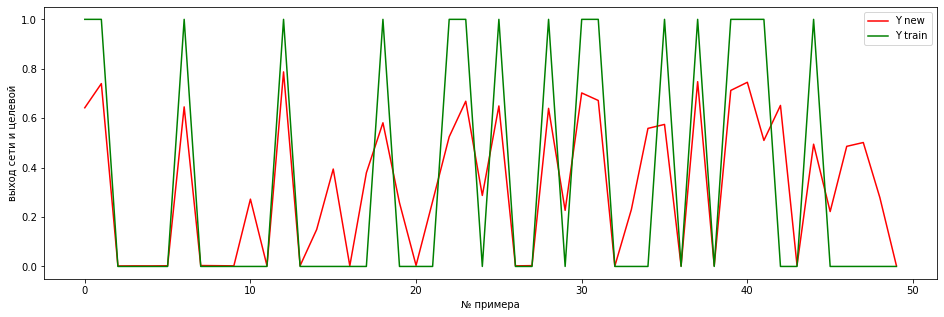

Аккуратность нейронной сети на тесте 77.28%


In [6]:
# прямое распространение(feed forward)
layer0_t = X_test
layer1_t = sigmoid(np.dot(layer0_t, w0))
layer2_t = sigmoid(np.dot(layer1_t, w1))
layer2_error_t = y_test - layer2_t
    
    
N = 50
plt.figure(figsize = (16,5))
plt.plot(layer2_t[:N,1], 'r',label = 'Y new')
plt.plot(y_test[:N,1],'g', label = 'Y train')
plt.xlabel('№ примера')
plt.ylabel('выход сети и целевой')
plt.legend( )
plt.show() # расскоментируйте, чтобы посмотреть

# метрика модели
error_t = np.mean(np.abs(layer2_error_t))
accuracy_t = (1 - error_t) * 100
print("Аккуратность нейронной сети на тесте " + str(round(accuracy_t,2)) + "%")

##### Посмортрим как влияет изменение числа нейронов на точность нейросети

In [7]:
# определим число нейронов скрытого слоя
neuron_numb = 5


# присваевание случайных весов
w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.005

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(3000):

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    # коррекция
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    # метрика модели
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
        
print("Аккуратность нейронной сети " + str(round(accuracy,2)) + "%")

Аккуратность нейронной сети 77.59%


In [8]:
result = []

neuron_numb = range(5, 210, 5)
learning_speed = [0.005]
epoch_numbers = [3000]

for nn in neuron_numb:
    for speed in learning_speed:
        for e_num in epoch_numbers:
            

            # определим число нейронов скрытого слоя
            neuron_numb = nn

            # присваевание случайных весов
            w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
            w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

            # скорость обучения (learning rate)
            n = speed

            # массив для ошибок, чтобы потом построить график
            errors = []

            # процесс обучения
            for i in range(e_num):

                # прямое распространение(feed forward)
                layer0 = X_train
                layer1 = sigmoid(np.dot(layer0, w0))
                layer2 = sigmoid(np.dot(layer1, w1))

                # обратное распространение(back propagation) с использованием градиентного спуска
                layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
                layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
                layer1_error = layer2_delta.dot(w1.T)
                layer1_delta = layer1_error * sigmoid_deriv(layer1)
                # коррекция
                w1 += layer1.T.dot(layer2_delta) * n
                w0 += layer0.T.dot(layer1_delta) * n
                # метрика модели
                error = np.mean(np.abs(layer2_error))
                errors.append(error)
                accuracy = (1 - error) * 100   
            result.append([nn, speed, e_num, accuracy])

In [9]:
neuron_num_optimizer = pd.DataFrame(result, columns=['neuron_num','learning_speed','epoch_numbers', 'accuracy']).sort_values('accuracy',ascending=False)
neuron_num_optimizer.head()

,neuron_num,learning_speed,epoch_numbers,accuracy
35,180,0.005,3000,82.898025
39,200,0.005,3000,82.866876
36,185,0.005,3000,82.851278
34,175,0.005,3000,82.836651
38,195,0.005,3000,82.748065


<AxesSubplot:xlabel='neuron_num', ylabel='accuracy'>

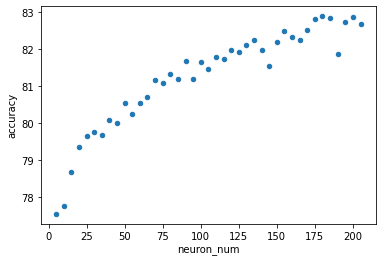

In [10]:
neuron_num_optimizer.plot(x="neuron_num", y="accuracy", kind="scatter")

#### Вывод: 
C увеличением числа нейронов точность нейросети растёт за редким исключением. Также наблюдается насыщение роста.

##### Посмортрим как влияет изменение скорости обучения на точность нейросети

In [11]:
result = []

neuron_numb = [200]
learning_speed = [0.001, 0.005, 0.01, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.1]
epoch_numbers = [3000]

for nn in neuron_numb:
    for speed in learning_speed:
        for e_num in epoch_numbers:
            

            # определим число нейронов скрытого слоя
            neuron_numb = nn

            # присваевание случайных весов
            w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
            w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

            # скорость обучения (learning rate)
            n = speed

            # массив для ошибок, чтобы потом построить график
            errors = []

            # процесс обучения
            for i in range(e_num):

                # прямое распространение(feed forward)
                layer0 = X_train
                layer1 = sigmoid(np.dot(layer0, w0))
                layer2 = sigmoid(np.dot(layer1, w1))

                # обратное распространение(back propagation) с использованием градиентного спуска
                layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
                layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
                layer1_error = layer2_delta.dot(w1.T)
                layer1_delta = layer1_error * sigmoid_deriv(layer1)
                # коррекция
                w1 += layer1.T.dot(layer2_delta) * n
                w0 += layer0.T.dot(layer1_delta) * n
                # метрика модели
                error = np.mean(np.abs(layer2_error))
                errors.append(error)
                accuracy = (1 - error) * 100   
            result.append([nn, speed, e_num, accuracy])

In [12]:
learning_speed_optimizer = pd.DataFrame(result, columns=['neuron_num','learning_speed','epoch_numbers', 'accuracy'])
learning_speed_optimizer

,neuron_num,learning_speed,epoch_numbers,accuracy
0,200,0.001,3000,76.031458
1,200,0.005,3000,83.068103
2,200,0.010,3000,85.770643
3,200,0.150,3000,66.666667
4,200,0.200,3000,55.333333
5,200,0.300,3000,45.333335
6,200,0.400,3000,44.666667
7,200,0.500,3000,45.333333
8,200,0.600,3000,66.666667
9,200,0.700,3000,43.333333


<AxesSubplot:xlabel='learning_speed'>

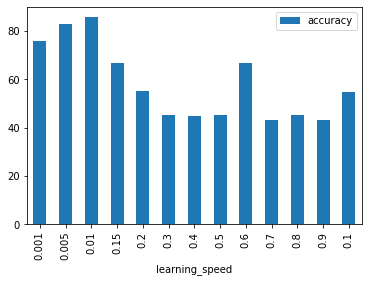

In [13]:
learning_speed_optimizer.plot(x="learning_speed", y="accuracy", kind="bar")

#### Вывод: 
C увеличением скорости обучения с 0,001 до 0,01 точность нейросети растёт затем падает, после чего либо ухудшается, либо меняется несущественно.

##### Посмортрим как влияет число эпох на точность нейросети

In [14]:
result = []

neuron_numb = [200]
learning_speed = [0.01]
epoch_numbers = [500, 1000, 1500, 2000, 3000, 10000]

for nn in neuron_numb:
    for speed in learning_speed:
        for e_num in epoch_numbers:
            

            # определим число нейронов скрытого слоя
            neuron_numb = nn

            # присваевание случайных весов
            w0 = 2*np.random.random((4, neuron_numb)) - 1 # для входного слоя   - 4 входа, 3 выхода
            w1 = 2*np.random.random((neuron_numb, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

            # скорость обучения (learning rate)
            n = speed

            # массив для ошибок, чтобы потом построить график
            errors = []

            # процесс обучения
            for i in range(e_num):

                # прямое распространение(feed forward)
                layer0 = X_train
                layer1 = sigmoid(np.dot(layer0, w0))
                layer2 = sigmoid(np.dot(layer1, w1))

                # обратное распространение(back propagation) с использованием градиентного спуска
                layer2_error = y_train - layer2 # производная функции потерь = производная квадратичных потерь 
                layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
                layer1_error = layer2_delta.dot(w1.T)
                layer1_delta = layer1_error * sigmoid_deriv(layer1)
                # коррекция
                w1 += layer1.T.dot(layer2_delta) * n
                w0 += layer0.T.dot(layer1_delta) * n
                # метрика модели
                error = np.mean(np.abs(layer2_error))
                errors.append(error)
                accuracy = (1 - error) * 100   
            result.append([nn, speed, e_num, accuracy])

In [15]:
epoch_num_optimizer = pd.DataFrame(result, columns=['neuron_num','learning_speed','epoch_numbers', 'accuracy']).sort_values('accuracy',ascending=False)
epoch_num_optimizer

,neuron_num,learning_speed,epoch_numbers,accuracy
5,200,0.01,10000,94.246462
4,200,0.01,3000,85.963873
3,200,0.01,2000,83.638105
2,200,0.01,1500,81.934374
1,200,0.01,1000,80.351920
0,200,0.01,500,77.726350


<AxesSubplot:xlabel='epoch_numbers'>

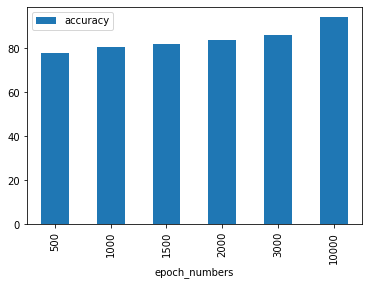

In [16]:
epoch_num_optimizer = pd.DataFrame(result, columns=['neuron_num','learning_speed','epoch_numbers', 'accuracy'])
epoch_num_optimizer.plot(x="epoch_numbers", y="accuracy", kind="bar")

#### Вывод: 
C увеличением числа эпох точность нейросети однозначно растёт.

#### 2. Проведите анализ — что приводит к ухудшению точности нейронной сети? Что приводит к увеличению ее точности?

К ухудшению точности сети приводят: неправильно подобраная скорость обучения и недостаточнo большое количество нейронов.

К увеличению точности приводит увеличение числа эпох.